# Representaciones en n-dimensiones

Una imagen tipo dispone de tres canales, Rojo, Azul y Verde, con un rango de valores para cada pixel entre 0 y 255.

<img src="./img/RGB.PNG">

Una imagen en escala de grises únicamente presenta una de esas capas donde los valores representan el blanco o el negro en sus extremos. Esto lo vemos en el caso del conjunto de datos de dígitos.

In [1]:
#importing the dataset
from sklearn.datasets import load_digits
 
digits = load_digits()
data = digits.data
data.shape

(1797, 64)

In [2]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

El tamaño del dataset (1797, 64) corresponde a una matriz de 8×8 pixels aplanada en sus 64 valores como un único array.

In [3]:
image_sample = data[0,:].reshape(8,8)
image_sample

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

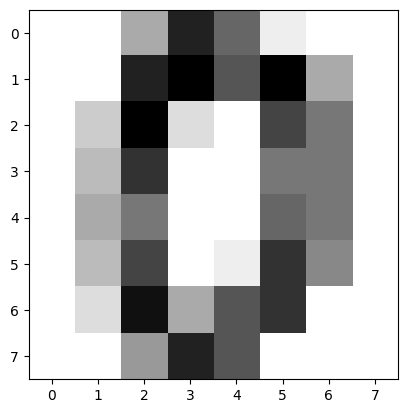

In [4]:
import matplotlib.pyplot as plt

plt.imshow(image_sample, cmap='binary');

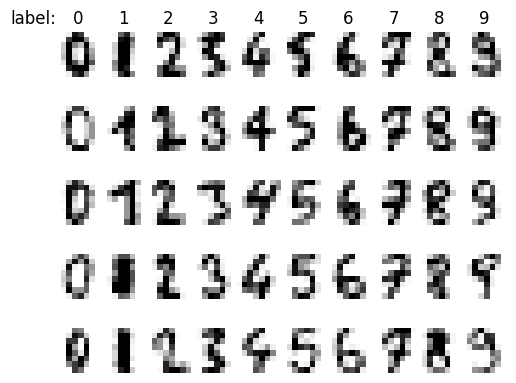

In [5]:
from visualize import plot_dataset

plot_dataset(digits.data, digits.target, rows=5)

Ahora, vamos a reducir esos 64 valores a sus dos componentes principales.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(2)
converted_data = pca.fit_transform(digits.data)

converted_data.shape

(1797, 2)

Tras reducir estos valores a sus dos primeras componentes podemos realizar el camino inverso para reconstruir las imágenes. De este modo, solo con guardar esos dos componentes y el modelo PCA podremos reducir la cantidad de dato a almacenar representando la misma información.

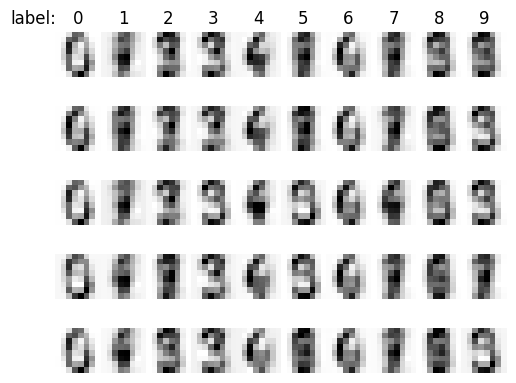

In [7]:
reconstruccion = pca.inverse_transform(converted_data)

plot_dataset(reconstruccion, digits.target, rows=5)

Es interesante entender cómo hemos reagrupado las imágenes en el espacio.

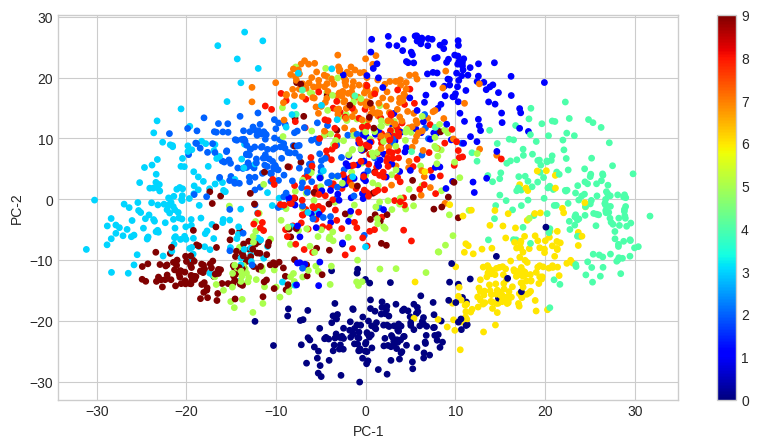

In [8]:
import matplotlib

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize = (10,5))
c_map = matplotlib.colormaps.get_cmap('jet')
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show();

Esto nos permitiría trabajar únicamente con esas dos componentes de cara a representar nuestro conjunto de datos y vemos en la imagen superior que dispone de cierta separabilidad entre los distintos grupos, lo cual apunta podemos construir un buen clasificador.

In [13]:
X = converted_data[:, 0:2]
y = digits.target

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)
knn.score(X, y)

0.7301057317751809

# t-SNE

Existen en este caso métodos que puede ayudarnos más a comprimir y acercar muestras dispersas por varianza entrenando una distribución más centrada en su valor medio como la distribución the `t-student`. Este es el ejemplo de _t-Stochastic Neighbor Embedding_ (t-SNE). Se plante al conversión para nuestras muestras dadas $X$ entre distancia Euclídea entre las muestras a una distribución de probabilidad asociada:

$$

p_{j|i} = \frac{\exp{\left(-\|x_i - x_j\|^2/2\sigma_i^2\right)}}{\sum_{k\ne i}{\exp{\left(-\|x_i - x_k\|^2/2\sigma_i^2\right)}}}

$$
donde $\sigma_i$ representa la varianza sobre una distribución normal centrada en el punto $x_i$. Planteamos un espacio de menor dimension donde las muestras puedan ser representadas $Y$ de forma que se cumpla:

$$

q_{j|i} = \frac{\exp{\left(-\|y_i - y_j\|^2\right)}}{\sum_{k\ne i}{\exp{\left(-\|y_i - y_k\|^2\right)}}}

$$
de modo que únicamente nos resta encontrar las representaciones $Y$ de forma que las probabilidades asociadas a cada muestra sean equiparables ($p_{j|i} \sim q_{j|i}$). Para esto nos apoyaremos en una métrica de similitud entre distribuciones conocida como la divergencia de Kullback-Leibler:

$$

D_{KL} = \sum_i KL(P_i||Q_i) = \sum_i\sum_j p_{j|i}\log \frac{p_{j|i}}{q_{j|i}}.

$$


Antes de poneros a estudiar todas estas cuestiones, vayamos con un ejemplo práctico que quizás sea más efectivo de cara al corto medio plazo.

In [15]:
X, y = load_digits(return_X_y=True)

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=40)
X_embedded = tsne.fit_transform(X)

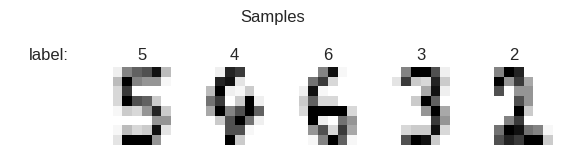

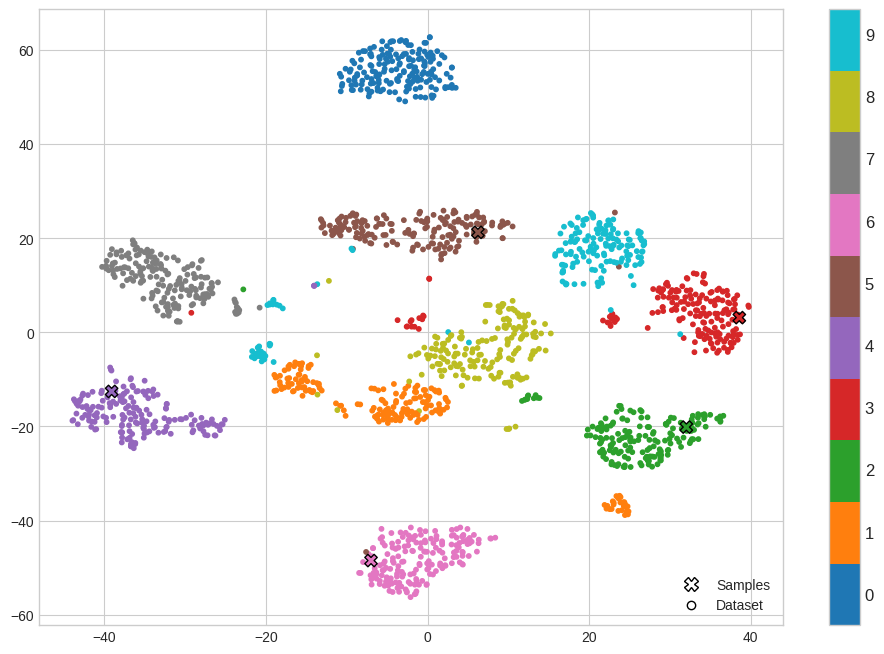

In [17]:
import numpy as np
from visualize import plot_numbers, plot_data_in_feature_space

rows = np.random.choice(np.arange(1000, X.shape[0]), 5, replace=False)
plot_numbers(X[rows, :], y[rows], title="label:")

plot_data_in_feature_space(X_embedded, y, highlight_rows=rows)

In [19]:
X = X_embedded
y = digits.target

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)
knn.score(X, y)

0.9872008903728436

Referencia:

* Sobre la reducción en el conjunto MNIST: https://colah.github.io/posts/2014-10-Visualizing-MNIST/
* Sobre t-SNE: https://jmlr.csail.mit.edu/papers/volume9/vandermaaten08a/vandermaaten08a.pdf